In [136]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [137]:
# hyper-param
num_points = 50
num_features = 5 # higher, the better it knows (from the X in real case)
noise_std = 5

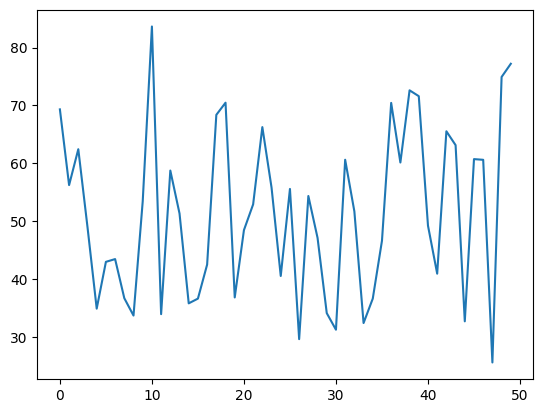

x shape:  (50, 5)


In [138]:
# 1 class
x = np.random.rand(num_points,num_features)*50
w_actual = np.random.rand(num_features)
b_actual = np.random.randint(0,1)
noise = np.random.normal(loc=0, scale=noise_std, size=num_points)
y = np.dot(x, w_actual) + noise + b_actual

plt.plot(y)
plt.show()
print("x shape: ", x.shape)

In [139]:
# 2 class
x = np.random.randn(num_points, num_features)
true_coefficients = np.array([2, -3])
true_coefficients = np.random.rand(num_features)
logits = np.dot(x, true_coefficients)
probabilities = 1 / (1 + np.exp(-logits))  # Apply sigmoid function
y = np.random.binomial(n=1, p=probabilities)  # Generate 2 class labelss randomly

# TODO: make plotting for variable num_feature
# plt.figure(figsize=(8, 6))
# plt.scatter(x[y == 0][:, 0],x[y == 0][:, 1], color='blue', label='Class 0')
# plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='red', label='Class 1')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Synthetic Data for Logistic Regression')
# plt.legend()
# plt.grid(True)
# plt.show()


In [140]:
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # Small value to avoid taking the log of zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


In [141]:
w = np.ones(num_features)*100
b = np.random.randint(0,100)/100

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

lr = 0.001
max_iter = 1000
loss_log = []

for iter in range(max_iter):
    y_predict_linear = np.dot(x,w) + b
    y_predict = sigmoid(y_predict_linear) # this is the difference from linear regression
    error = y_predict - y
    
    # loss = cross_entropy_loss(y, y_predict)
    
    dw = (1/num_points) * np.dot(x.T, error)
    db = (1/num_points) * np.sum(error)
    w -= lr * dw
    b -= lr * db

# TODO: fix loss
    
#     loss = cross_entropy_loss(y,y_predict)
#     loss_log.append(loss)

# plt.plot(loss_log)
# plt.xlabel("Iterations")
# plt.ylabel("Loss")
# plt.show()
# print("Loss: ", loss)

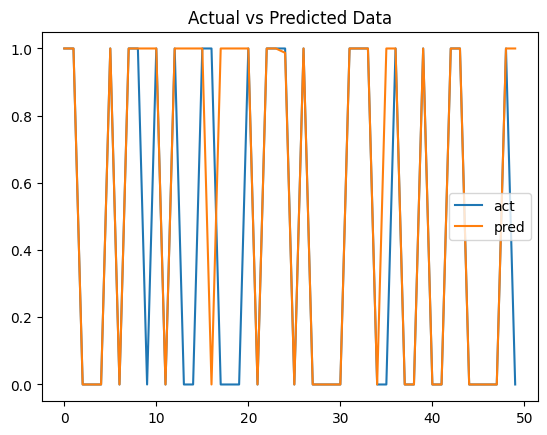

Act: 0, Pred: 2.85890786036842e-33
Act: 0, Pred: 7.821536277563162e-07
Act: 0, Pred: 1.6807012698880803e-22
Act: 0, Pred: 7.611479375140407e-64
Act: 1, Pred: 1.0
Act: 0, Pred: 6.317274383430822e-25
Act: 1, Pred: 1.0
Act: 0, Pred: 1.0
Act: 0, Pred: 1.0
Act: 1, Pred: 1.0


In [142]:
plt.plot(y,label='act')
plt.plot(y_predict, label ='pred')
plt.title("Actual vs Predicted Data")
plt.legend()
plt.show()
for _ in range(10):
    index = np.random.randint(num_points)
    print(f"Act: {y[index]}, Pred: {y_predict[index]}")